<h1 align="center">
    PRACTICA EXPERIMENTAL #3
    </br>
    CIRCUITO RC: CARGA Y DESCARGA DEL CAPACITOR
</h1>

| IDENTIFICACIÓN | |
| :- | :- |
| Nombre de la asignatura | Electromagnetismo |
| Programa Académico | Ingeniería de Sistemas |
| Docente | Dr. Carlos Eduardo Martinez Nuñez |
| Nombre del Estudiante | Andrés Galván, Javier Guerra |

---

## OBJETIVO GENERAL

Estudiar los fenómenos de carga y descarga del capacitor en un circuito RC y determinar su constante de tiempo (𝜏) asociada.

---

## OBJETIVOS ESPECÍFICOS

- Construir un circuto simple RC.
- Estudiar el comportamiento de carga de un capacitor en un circuito simple RC.
- Estudiar el comportamiento de descarga de un capacitor en un circuito simple RC. 
- Determinar la constante de tiempo (𝜏) asociada al circuito RC.

# Procedimiento

## Instalar dependencias

In [1]:
# from sys import executable

# !{executable} -m pip install pandas
# !{executable} -m pip install matplotlib
# !{executable} -m pip install openpyxl
# !{executable} -m pip install numpy

## Configuración

In [2]:
from matplotlib.pyplot import style

style.use("seaborn-whitegrid")

## Experiencia #1

### Carga del capacitor

In [3]:
from utils import up_mil, crear_tabla

c_corrientes = [135.707, 123.742, 120.926, 113.002, 106.151, 97.323, 91.969,
                84.622, 77.98, 70.632, 63.375, 56.963, 49.478, 42.844, 35.332,
                28.689, 21.736, 14.816, 7.798, 955.564e-3
]

c_voltajes   = [572.711e-3, 2.726, 3.233, 4.66, 5.893, 7.482, 8.446,
                9.768, 10.964, 12.286, 13.592, 14.747, 16.094, 17.288,
                18.64, 19.836, 21.087, 22.333, 23.596, 24.828
]

c_tiempos    = [1.46, 7.275, 8.725, 12.995, 16.935, 22.405, 25.97,
                31.215, 36.365, 42.6, 49.43, 56.15, 65.025, 74.095,
                86.24, 99.36, 116.845, 140.99, 181.43, 313.685
]

carga_dataframe = crear_tabla(c_tiempos, c_corrientes, c_voltajes)
carga_dataframe

Datos,t (ms),Ic (mA),Vc (volts)
1,1.460,135.707000,0.572711
2,7.275,123.742000,2.726000
3,8.725,120.926000,3.233000
4,12.995,113.002000,4.660000
5,16.935,106.151000,5.893000
6,22.405,97.323000,7.482000
7,25.970,91.969000,8.446000
8,31.215,84.622000,9.768000
9,36.365,77.980000,10.964000
10,42.600,70.632000,12.286000


#### Gráfica

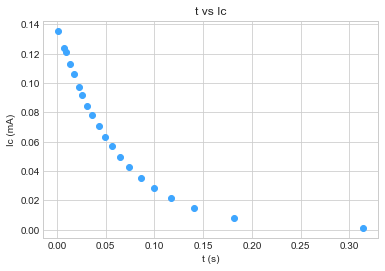

In [4]:
from utils import graficar, ResultadoExperimental

carga_dataframe_grafica = crear_tabla([up_mil(i) for i in c_tiempos], [up_mil(i) for i in c_corrientes], c_voltajes)
resultado_carga = ResultadoExperimental(carga_dataframe_grafica)
graficar("t vs Ic", resultado_carga)

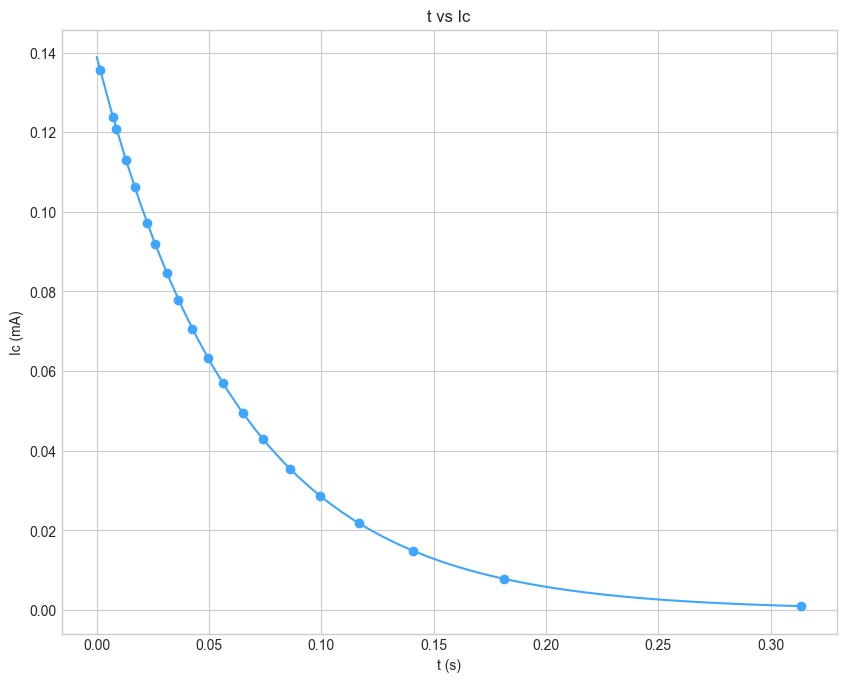

In [5]:
graficar("t vs Ic", resultado_carga, teorico=True)

In [6]:
from numpy import polyfit

constante_experimental = polyfit(resultado_carga.log_vector(), c_tiempos, 1)[0]
constante_experimental

-145.06292532367695

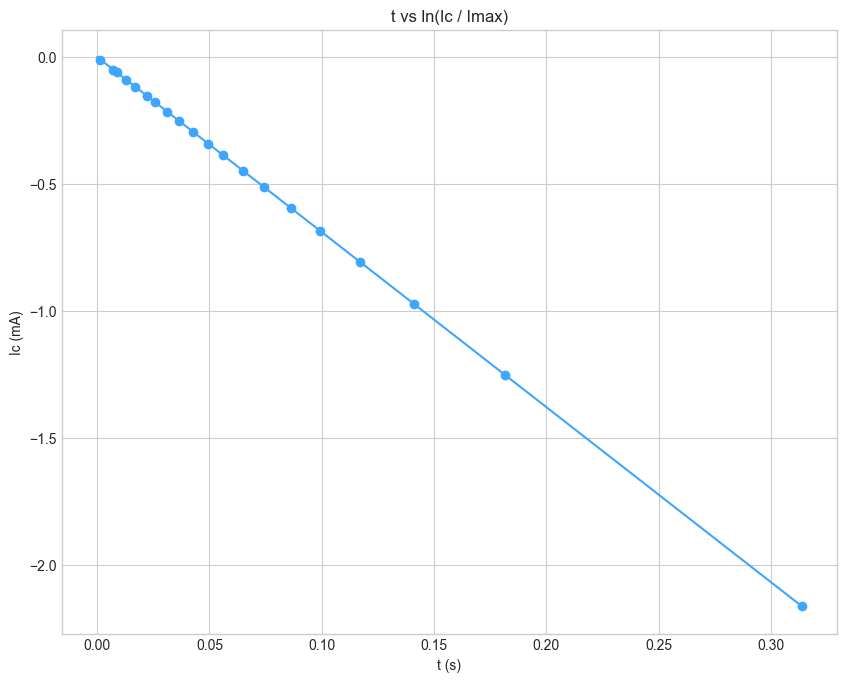

In [7]:
graficar("t vs ln(Ic / Imax)", resultado_carga, y_label="ln(Ic / Imax)", log=True, teorico=True)

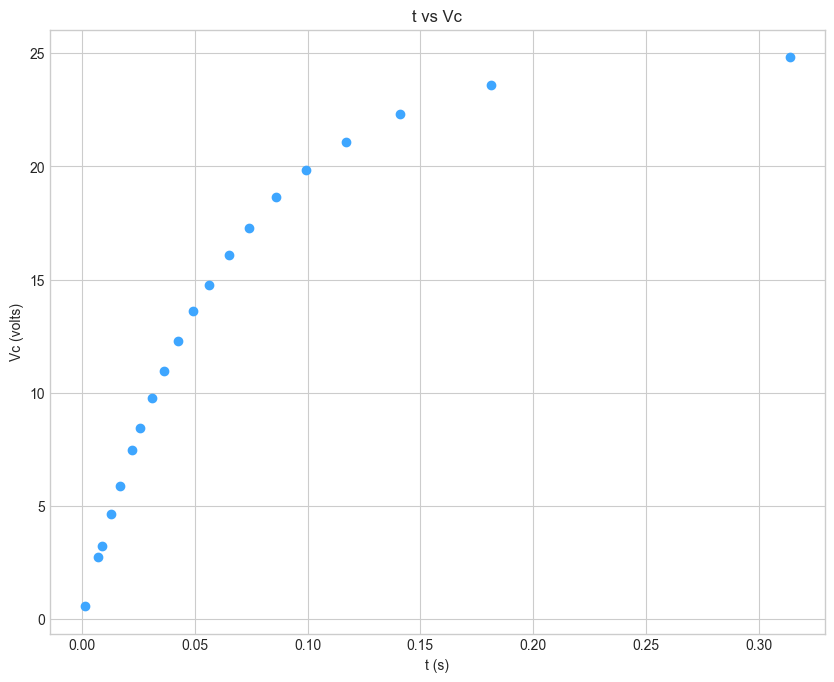

In [8]:
graficar("t vs Vc", resultado_carga, y_axis="Vc (volts)")

### Descarga del capacitor

In [9]:
d_tiempos    = [705.505,  708.905,  712.5,  716.295,  720.435,
                724.74,  729.41,  734.395,  739.92,  745.935,
                752.665,  759.94,  768.395,  778.03,  789.535,
                803.545,  821.72,  847.215,  891.215,  934.54
]

d_voltajes   = [23.746,  22.498,  21.250,  20.008,  18.735,
                17.498,  16.248,  15.012,  13.751,  12.499,
                11.233,  10.008,  8.751,  7.510,  6.256,
                5.009,  3.754,  2.504,  1.246, up_mil(626.202)
]

d_corrientes = [131.919,  124.989,  118.056,  111.155,  104.085,
                97.21,  90.265,  83.398,  76.395,  69.439,
                62.403,  55.598,  48.615,  41.721,  34.757,
                27.827,  20.853,  13.913,  6.92,  3.479
]
d_corrientes = [i * -1 for i in d_corrientes]
d_tiempos = [i - d_tiempos[0] for i in d_tiempos]

descarga_dataframe = crear_tabla(d_tiempos, d_corrientes, d_voltajes)
descarga_dataframe

Datos,t (ms),Ic (mA),Vc (volts)
1,0.000,-131.919,23.746000
2,3.400,-124.989,22.498000
3,6.995,-118.056,21.250000
4,10.790,-111.155,20.008000
5,14.930,-104.085,18.735000
6,19.235,-97.210,17.498000
7,23.905,-90.265,16.248000
8,28.890,-83.398,15.012000
9,34.415,-76.395,13.751000
10,40.430,-69.439,12.499000


#### Gráfica

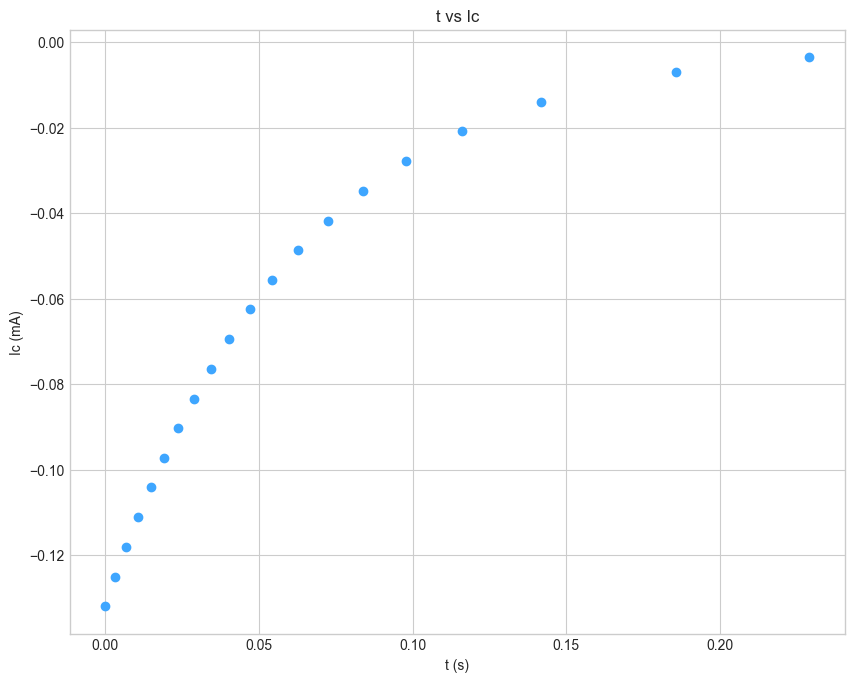

In [10]:
descarga_dataframe_grafica = crear_tabla([up_mil(i) for i in d_tiempos], [up_mil(i) for i in d_corrientes], d_voltajes)
resultado_descarga = ResultadoExperimental(descarga_dataframe_grafica, carga=False)
graficar("t vs Ic", resultado_descarga)

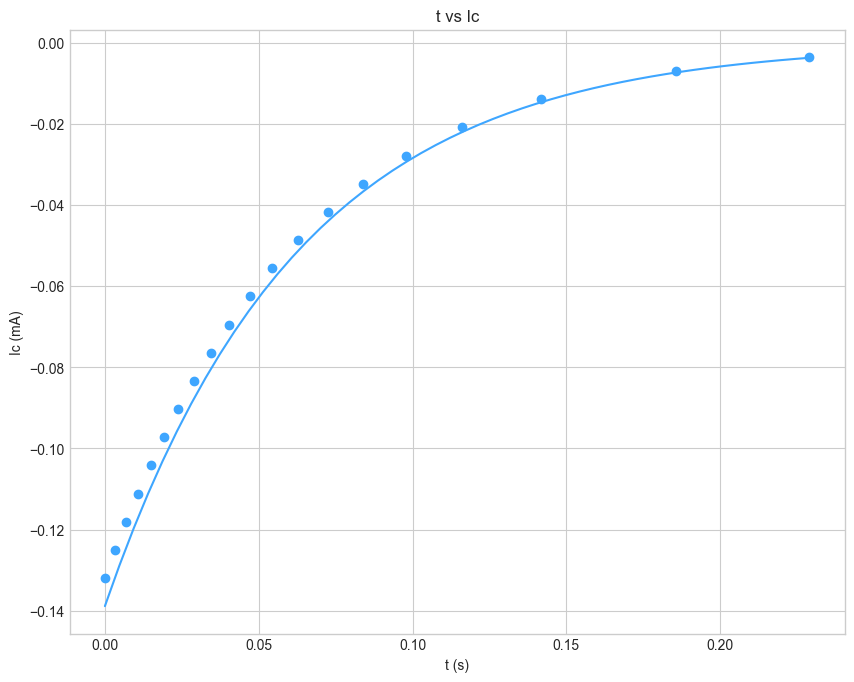

In [11]:
graficar("t vs Ic", resultado_descarga, teorico=True)

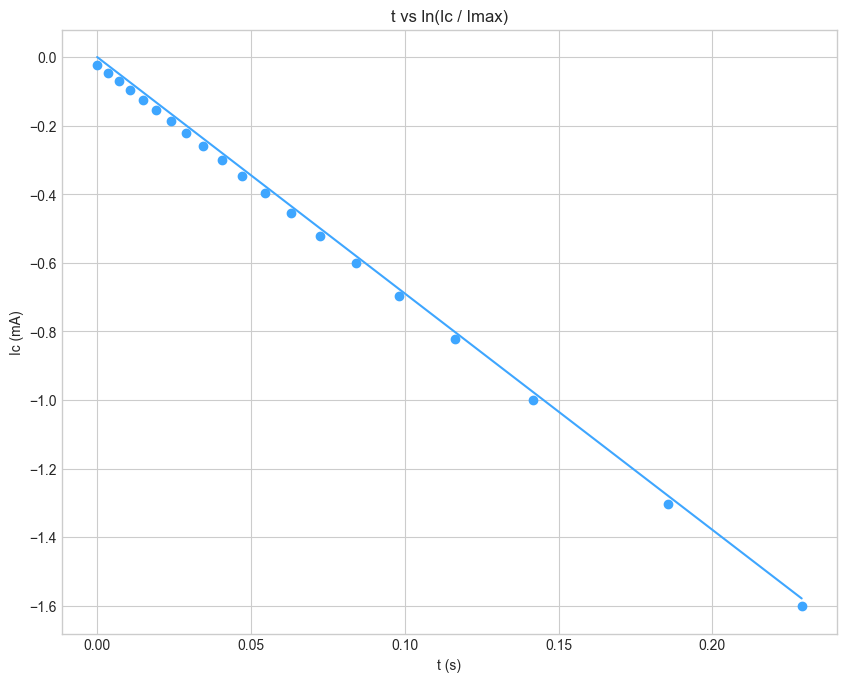

In [12]:
graficar("t vs ln(Ic / Imax)", resultado_descarga, y_label="ln(Ic / Imax)", log=True, teorico=True)

### Resultados

In [14]:
from utils import resultado_experimentacion

resultado_experimentacion(resultado_carga, resultado_descarga)

,Constante de tiempo,Experimental (s),Teórico (s),Error Porcentual (%)
0,t1,6.893560,6.893563,0.00004444%
1,t2,6.893538,6.893563,0.00036129%
